# **Data Pre-processing part 1**

In this notebook we will work with the dataset "movie_metadata.csv". Here we have movies only upto 2016. 

In [3]:
# Importing the necessary libraries

import numpy as np
import pandas as pd

In [5]:
# Loading the datset "movie_medata"

data = pd.read_csv("datasets/movie_metadata.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
# Lets check the shape of our dataset

data.shape

(5043, 28)

In [8]:
# Lets see the names of all the features

data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

<AxesSubplot:>

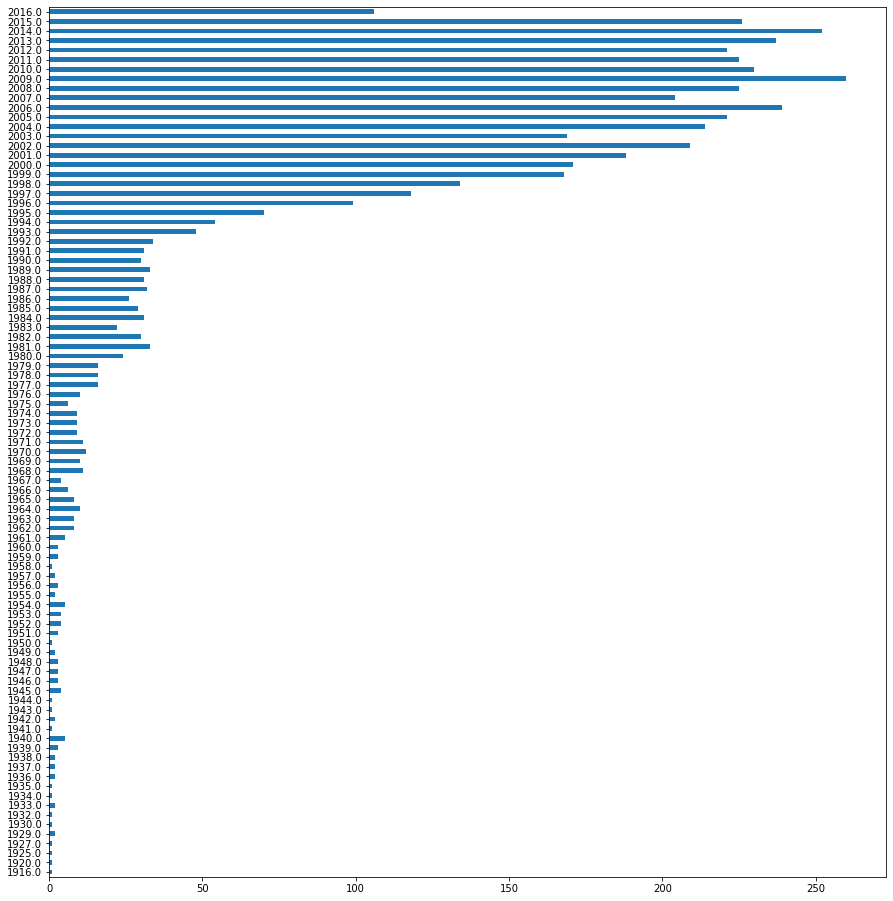

In [10]:
# Lets plot the movie releases by year

import matplotlib.pyplot as plt
%matplotlib inline

data["title_year"].value_counts().sort_index().plot(kind = "barh", figsize = (15,16))

In [11]:
# Let's select few features based on which we will build our Recommendation system.

data = data.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [12]:
# Let's replace the nan values with "unknown" for all the features selected above

data["actor_1_name"] = data["actor_1_name"].replace(np.nan, "unknown")
data["actor_2_name"] = data["actor_2_name"].replace(np.nan, "unknown")
data["actor_3_name"] = data["actor_3_name"].replace(np.nan, "unknown")
data["director_name"] = data["director_name"].replace(np.nan, "unknown")

# Lets see our data
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [13]:
# Replcing the "|" with "," in feature "genres"

data["genres"] = data["genres"].str.replace("|", ",")
data

C:\Users\SWARNAVA\anaconda3\envs\movie\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,"Action,Adventure,Fantasy,Sci-Fi",Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,"Action,Adventure,Fantasy",Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,"Action,Adventure,Thriller",Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,"Action,Thriller",The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,"Comedy,Drama",Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,"Crime,Drama,Mystery,Thriller",The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,"Drama,Horror,Thriller",A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,"Comedy,Drama,Romance",Shanghai Calling


In [14]:
# Lets change the movie title into lower case

data["movie_title"] = data["movie_title"].str.lower()
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,"Action,Adventure,Fantasy,Sci-Fi",avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,"Action,Adventure,Fantasy",pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,"Action,Adventure,Thriller",spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,"Action,Thriller",the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,"Comedy,Drama",signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,"Crime,Drama,Mystery,Thriller",the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,"Drama,Horror,Thriller",a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,"Comedy,Drama,Romance",shanghai calling


We can see that there is a character at the end of every input in the "movie_title" feature. Lets try to remove it.

In [16]:
# Lets remove it
data["movie_title"] = data["movie_title"].apply(lambda x : x[:-1])
# Lets see now
print(data["movie_title"][1])

pirates of the caribbean: at world's en


In [17]:
# lets convert the dataframe into a csv for future use

data.to_csv("data.csv", index = False)